In [79]:
"!git clone https://github.com/Ludostck/Projet.git"
path = "./Images/"

In [80]:
IMAGE_SIZE = 128
CLASSES = ['Galaxie', 'Nébuleuses', 'Comètes','Amas','Lunes']

In [81]:
import glob
import PIL
from PIL import Image
import numpy as np

import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                img = img.resize((image_size, image_size), Image.Resampling.LANCZOS)

                # Redimensionnement de l'image et écriture dans la variable de retour x 
                
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y


x_train, y_train = load_data(path, CLASSES, dataset='train', image_size=IMAGE_SIZE)

x_val, y_val = load_data(path, CLASSES, dataset='validation', image_size=IMAGE_SIZE)

x_test, y_test = load_data(path, CLASSES, dataset='test', image_size=IMAGE_SIZE)

# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_train shape: (6117, 128, 128, 3)
y_train shape: (6117, 1)
x_val shape: (711, 128, 128, 3)
y_val shape: (711, 1)


C:\Users\ludos\AppData\Local\Temp\ipykernel_10628\46290205.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(CLASSES[int(y_train[image_index])])


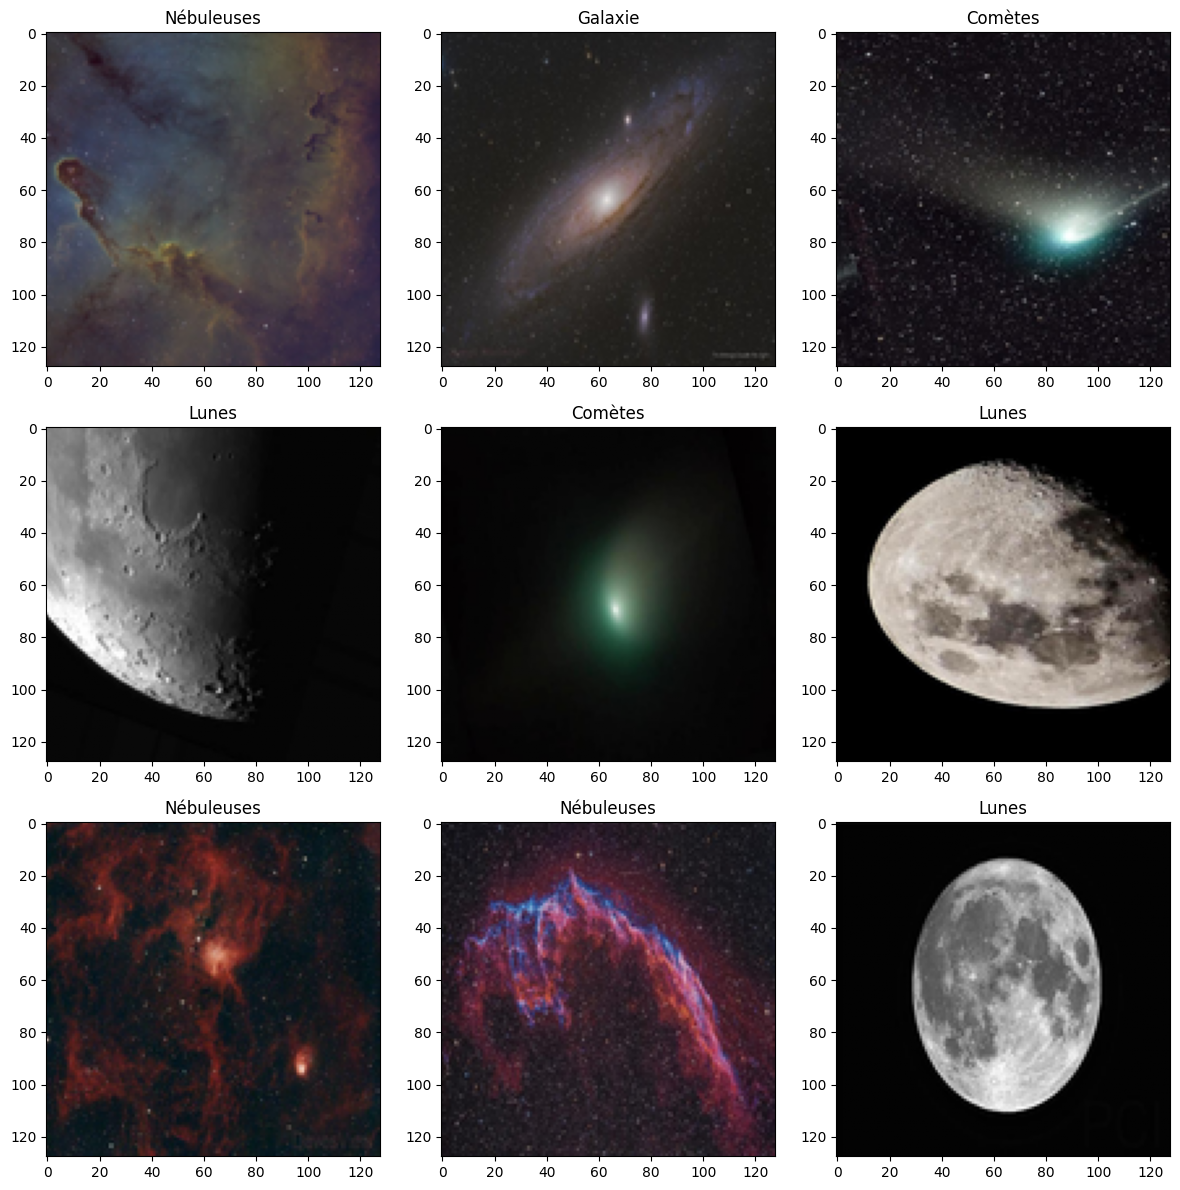

In [82]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 9  # Choix aléatoire entre 1 et 9 images

plt.figure(figsize=(12, 12))

# Générer des indices aléatoires basés sur la taille de x_train
shuffle_indices = np.random.permutation(len(x_train))

for i in range(num_images):
    plt.subplot(3, 3, i+1)  # S'assurer de ne pas dépasser 9
    # Utiliser un index aléatoire pour sélectionner l'image
    image_index = shuffle_indices[i]
    image = x_train[image_index]
    # Afficher le titre basé sur l'étiquette de l'image choisie
    plt.title(CLASSES[int(y_train[image_index])])
    # Normaliser l'image pour l'affichage
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# A COMPLETER
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense
model.add(Dense(512, activation='relu',input_dim=12))   # Couche dense, à 512 neurones
model.add(Dense(5, activation='softmax',input_dim = 512))   # Couche de sortie

c:\Users\ludos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\ludos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,547,877 (9.72 MB)

 Trainable params: 2,547,877 (9.72 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
from tensorflow.keras import optimizers

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=5e-5),
              metrics=['accuracy'])

In [86]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=10)

Epoch 1/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 0.5877 - loss: 1.0088 - val_accuracy: 0.8411 - val_loss: 0.4372
Epoch 2/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.8857 - loss: 0.3581 - val_accuracy: 0.9226 - val_loss: 0.2478
Epoch 3/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.9163 - loss: 0.2520 - val_accuracy: 0.9198 - val_loss: 0.2230
Epoch 4/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.9353 - loss: 0.1944 - val_accuracy: 0.9339 - val_loss: 0.1947
Epoch 5/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9419 - loss: 0.1823 - val_accuracy: 0.9311 - val_loss: 0.1851
Epoch 6/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.9513 - loss: 0.1552 - val_accuracy: 0.9437 - val_loss: 0.1679
Epoch 7/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9600 - loss: 0.1247 - val_accuracy: 0.9395 - val_loss: 0.1942
Epoch 8/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9672 - loss: 0.1038 - 

In [87]:
model.save("Projet.h5")

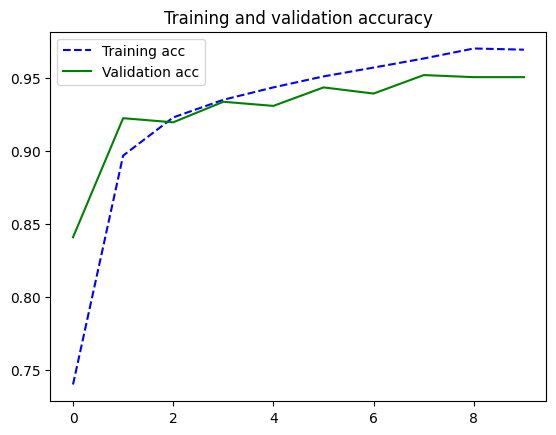

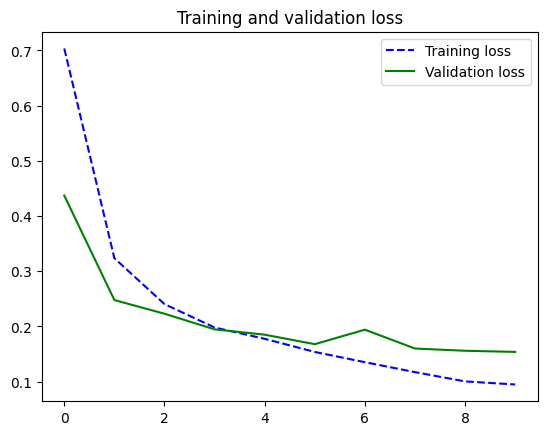

In [92]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
plot_training_analysis()

In [89]:
# Effectuer une prédiction avec le modèle sur x_test
predictions_val = model.predict(x_test)

# Convertir les prédictions en étiquettes réelles
# Utilisez np.argmax pour convertir les prédictions de one-hot encoding vers des étiquettes
predictions_val_labels = np.argmax(predictions_val, axis=1)  # Correction ici : utiliser axis=1

# Calculer la précision sur le jeu de test
# Assurez-vous que y_test est de la bonne forme; il devrait être un vecteur simple de labels.
accuracy_val = np.mean(predictions_val_labels == y_test.flatten()) * 100
print(f'Précision sur le jeu de test : {accuracy_val:.2f}%')


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Précision sur le jeu de test : 92.74%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\ludos\AppData\Local\Temp\ipykernel_10628\127329125.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = CLASSES[int(y_test[image_index])]


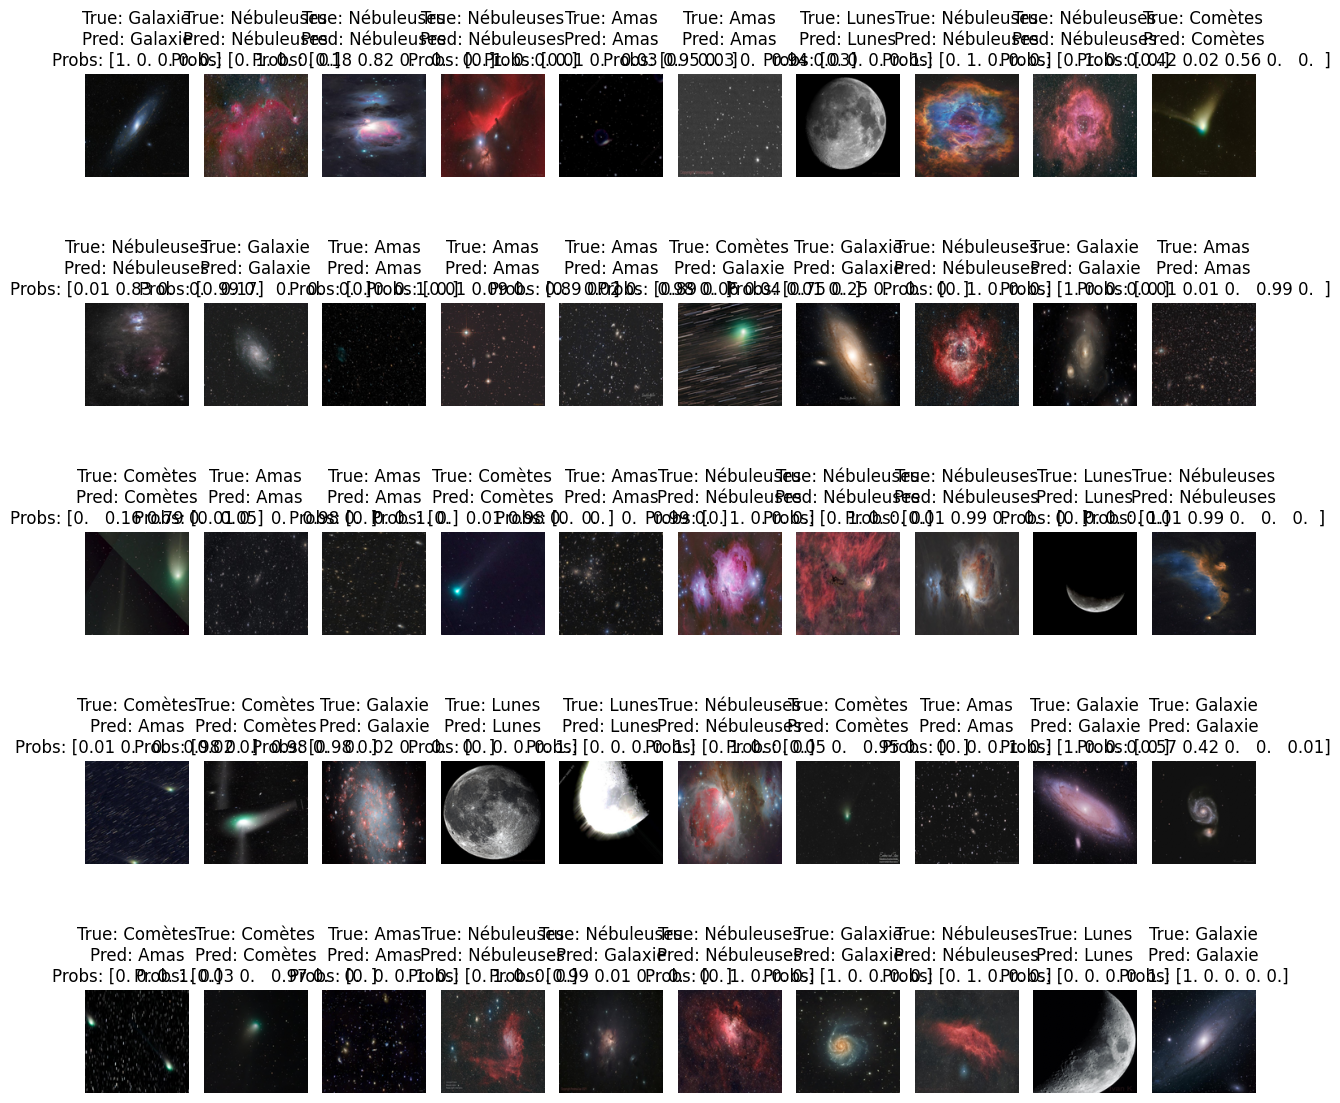

In [97]:
num_images = 50  # Choix aléatoire entre 1 et 9 images
shuffle_indices = np.random.permutation(len(x_test))

predictions = model.predict(x_test[shuffle_indices[:num_images]])

plt.figure(figsize=(12, 12))

for i in range(num_images):
    plt.subplot(5, 10, i+1)
    image_index = shuffle_indices[i]
    image = x_test[image_index]

    # Obtenir la vraie classe
    true_label = CLASSES[int(y_test[image_index])]
    
    # Obtenir la classe prédite et les probabilités
    predicted_label = CLASSES[np.argmax(predictions[i])]
    probs = predictions[i]
    
    # Afficher l'image avec le titre indiquant la vraie classe et la classe prédite
    plt.title(f"True: {true_label}\nPred: {predicted_label}\nProbs: {np.round(probs, 2)}")
    plt.imshow(image)
    plt.axis('off')  # Enlève les axes pour une meilleure clarté

plt.tight_layout()
plt.show()

In [94]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model

# Assurez-vous que le modèle est chargé correctement, adaptez le chemin au besoin.
model = load_model('Projet.h5')  # Mettez ici le chemin vers votre modèle

def load_image():
    # Choix de l'image
    file_path = filedialog.askopenfilename()
    if not file_path:  # Vérifie si le chemin n'est pas vide
        return
    
    # Chargement et affichage de l'image choisie
    img = Image.open(file_path)
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.Resampling.LANCZOS)  # Redimensionnement de l'image
    img_tk = ImageTk.PhotoImage(img)
    panel.configure(image=img_tk)
    panel.image = img_tk  # Garde une référence
    classify_image(img)  # Classifie l'image

def classify_image(img):
    # Prétraitement de l'image pour la classification
    img_array = np.array(img) / 255.0  # Normalisation
    img_array = img_array.reshape((1, IMAGE_SIZE, IMAGE_SIZE, 3))  # Ajout de la dimension du batch

    # Prédiction
    predictions = model.predict(img_array)
    predicted_class = CLASSES[np.argmax(predictions)]  # Remplacer CLASSES par vos classes réelles
    prob = np.max(predictions)
    
    # Affichage de la classe prédite et de la probabilité
    result_label.config(text=f'Predicted: {predicted_class} ({prob:.2f})')

# Création de la fenêtre Tkinter
root = tk.Tk()
root.title('Image Classifier')

# Ajout d'un bouton pour charger une image
btn_load = tk.Button(root, text='Load Image', command=load_image)
btn_load.pack()

# Panneau pour afficher l'image choisie
panel = tk.Label(root)
panel.pack()

# Étiquette pour afficher la prédiction
result_label = tk.Label(root, text='Prediction will appear here', font=('Arial', 16))
result_label.pack()

# Lancement de l'application
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ludos\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ludos\AppData\Local\Temp\ipykernel_10628\1907329851.py", line 17, in load_image
    img = Image.open(file_path)
          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ludos\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py", line 3309, in open
    raise UnidentifiedImageError(msg)
PIL.UnidentifiedImageError: cannot identify image file 'C:/Users/ludos/OneDrive/Documents/Images/vid tel/Snapchat-1050642883.mp4'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ludos\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ludos\AppData\Local\Temp\ipykernel_10628\1907329851.py", line 22, in load_image
    classify_image(img)  # Classifie l'image
    ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ludos\AppData\Local\Temp\ipykernel_10628\1907329851.py", line 27, in classify_image
    img_array = img_array.reshape((1, IMAGE_SIZE, IMAGE_SIZE, 3))  # Ajout de la dimension du batch
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: cannot reshape array of size 65536 into shape (1,128,128,3)
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ludos\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ludos\AppDat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
